In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from skimage.data import load
from skimage.filters import roberts, sobel, scharr, prewitt_h, prewitt_v, prewitt
import skimage


In [2]:
osdir = os.getcwd()
img = cv2.imread('photo-1506794778202-cad84cf45f1d.jpeg')


In [3]:
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

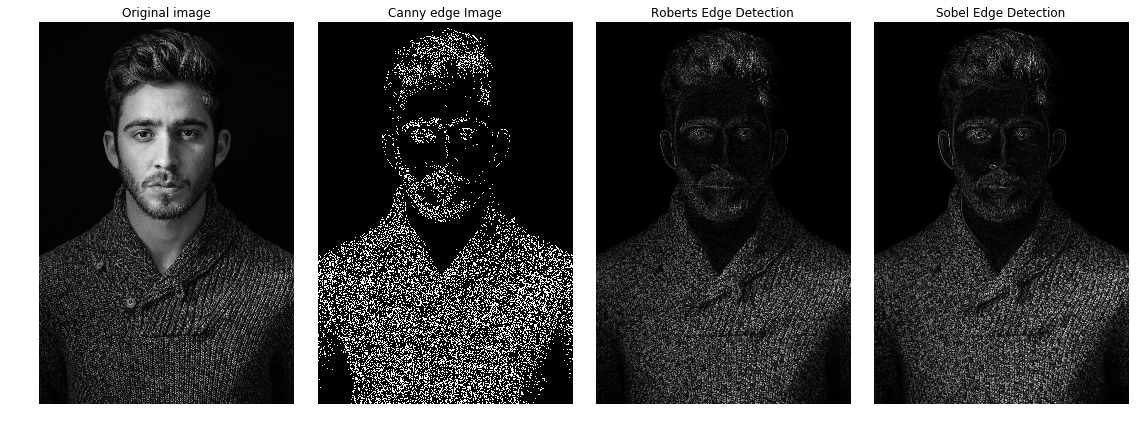

In [4]:
edge_canny = cv2.Canny(gray_image,100,100)
edge_roberts = roberts(gray_image)
edge_sobel = sobel(gray_image)

# Plotting

fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(16, 8))

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_canny, cmap=plt.cm.gray)
ax[1].set_title('Canny edge Image')

ax[2].imshow(edge_roberts, cmap=plt.cm.gray)
ax[2].set_title('Roberts Edge Detection')

ax[3].imshow(edge_sobel, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

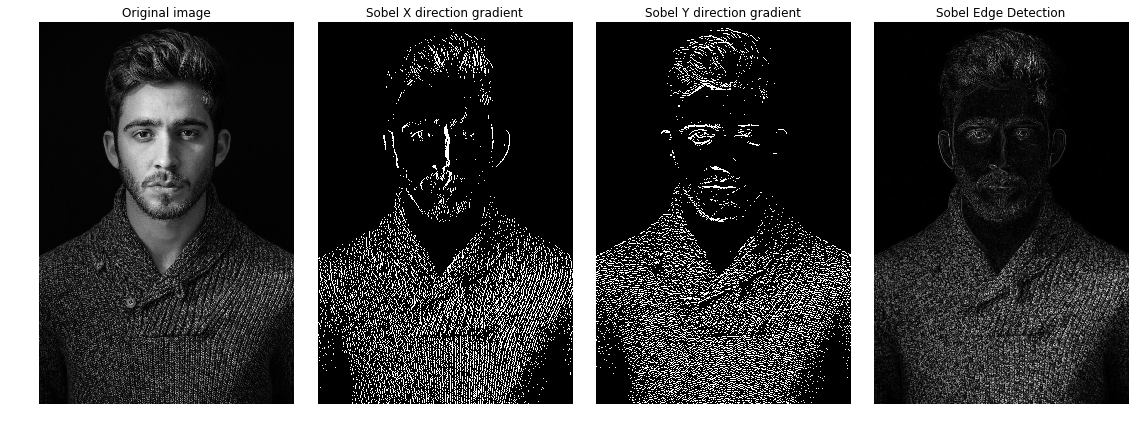

In [11]:
sobelx = cv2.Sobel(gray_image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray_image,cv2.CV_64F,0,1,ksize=5)

thresh = skimage.filters.threshold_otsu(sobelx)
bin_x = sobelx < thresh

thresh = skimage.filters.threshold_otsu(sobely)
bin_y = sobely > thresh



fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(16, 8))

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(bin_x, cmap=plt.cm.gray)
ax[1].set_title('Sobel X direction gradient')

ax[2].imshow(bin_y, cmap=plt.cm.gray)
ax[2].set_title('Sobel Y direction gradient')

ax[3].imshow(edge_sobel, cmap=plt.cm.gray)
ax[3].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

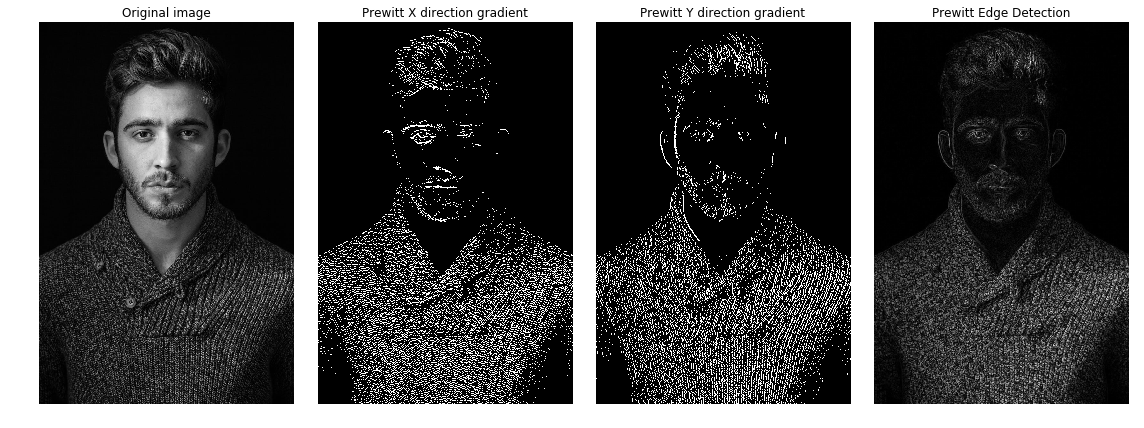

In [6]:
edge_prewitt_h = prewitt_h(gray_image, mask=None)
edge_prewitt_v = prewitt_v(gray_image, mask=None)
edge_prewitt = prewitt(gray_image, mask=None)

thresh = skimage.filters.threshold_otsu(edge_prewitt_v)
binary_v = edge_prewitt_v > thresh

thresh = skimage.filters.threshold_otsu(edge_prewitt_h)
binary_h = edge_prewitt_h > thresh

fig, ax = plt.subplots(ncols=4, sharex=True, sharey=True,
                       figsize=(16, 8))

ax[0].imshow(gray_image, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(binary_h, cmap=plt.cm.gray)
ax[1].set_title('Prewitt X direction gradient')

ax[2].imshow(binary_v, cmap=plt.cm.gray)
ax[2].set_title('Prewitt Y direction gradient')

ax[3].imshow(edge_prewitt , cmap=plt.cm.gray)
ax[3].set_title('Prewitt Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [18]:
bin_x.dtype='uint8'
cv2.imwrite('vertical_edges.jpg', bin_x*255)

True

In [19]:
bin_y.dtype='uint8'
cv2.imwrite('horizontal_edges.jpg', bin_y*255)

True